# Import

In [2]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("1.11.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  404k    0  404k    0     0   793k      0 --:--:-- --:--:-- --:--:-- 5326k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision stable) to /tmp/pip-req-build-8hyvsnbm
  Running command git clone -q https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-8hyvsnbm
  Running command git checkout -q 276c9a8acbfa715f5802f26ec9f4141bde26ecb4
  Using cached fvcore-0.1.5.post20220512.tar.gz (50 kB)
  Using cached iopath-0.1.10.tar.gz (42 kB)
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached portalocker-2.5.1-py2.py3-none-any.whl (15 kB)
  Created wheel for pytorch3d: filename=pytorch3d-0.7.0-cp37-cp37m-linux_x86

In [3]:
import numpy as np

import os
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Util function for loading point clouds|
import numpy as np

# Data structures and functions for rendering
from pytorch3d.structures import Pointclouds
from pytorch3d.vis.plotly_vis import AxisArgs, plot_batch_individually, plot_scene

from mpl_toolkits.mplot3d import proj3d

# Plot point cloud 

In [4]:
def reshapePointCloudData(pointCloud):
  column=4
  print(pointCloud.shape)
  row=int(pointCloud.shape[0]/column)
  pointCloud=np.reshape(pointCloud,(row,column))
  pointCloud=pointCloud[~np.all(pointCloud == 0, axis=1)]
  print("Confidence Value Histogram(The value should be between 0 and 1):")
  plt.hist(pointCloud[:,3])
  plt.show() 
  pointCloud=np.delete(pointCloud, 3, 1)
  return pointCloud
def plot3DPointCloud_matplotlib(pointCloud):
  x = pointCloud[:, 0]
  y = pointCloud[:, 1]
  z = pointCloud[:, 2]
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x, y, z)
  plt.show()
def getTensorPointCloud_pytorch3D(pointCloud):
  #Setup
  if torch.cuda.is_available():
      device = torch.device("cuda:0")
      torch.cuda.set_device(device)
  else:
      device = torch.device("cpu")
    
  verts = torch.Tensor(pointCloud).to(device)
  point_cloud = Pointclouds(points=[verts])
  return point_cloud



(57600,)
Confidence Value Histogram(The value should be between 0 and 1):


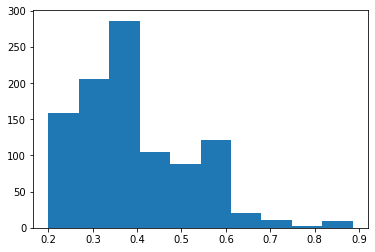

array([[ 0.20022008, -0.19877565, -0.8254427 ],
       [ 0.19478077, -0.20083553, -0.80723673],
       [ 0.18844482, -0.20170331, -0.78608406],
       ...,
       [-0.25316653, -0.23988244, -0.39534095],
       [-0.24256936, -0.24671704, -0.37182707],
       [-0.2427125 , -0.25024068, -0.37122446]], dtype=float32)

In [5]:
rawDepthPointCloudData= np.fromfile("rawDepthPointCloudData.txt", dtype = np.float32)
rawDepthPointCloudData=reshapePointCloudData(rawDepthPointCloudData)
rawDepthPointCloudData

In [6]:
rawDepthPointCloudData.shape

(1006, 3)

In [7]:
plot_scene({
    "Pointcloud": {
        "GoogleARCore": getTensorPointCloud_pytorch3D(rawDepthPointCloudData)
    }
})
